In [ ]:
# Data Analysis - 
# Version 1
## 1/14/25
## 15:30

In [22]:
# Importing Modules
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

# Now you can use absolute imports
from d497_helpers import folder_manager as fm, archive_module, checkpoint_helper as CheckPoint, database_helper as db_tool, config, import_dataframe

#### #### #### #### 


import itertools

# Pandas
import pandas as pd

# Numpy
import numpy as np

# RegularExpression for string matching
import re

# GLOB 
import glob 

# Pathlib 
from pathlib import Path
    
# CSV
import csv

# RapidFuzzr
from rapidfuzz import process

import geopandas as gpd

import matplotlib.pyplot as plt


In [3]:

# Load county shapefile
counties = gpd.read_file(config.global_data_folder_path + '/shapefile/tl_2024_us_county.shp')

In [8]:
ufo_import_csv, ufo_import_pickle = import_dataframe.import_dataframe("ufo_data", "cleaned", "ufo_data_main_df")

In [9]:
ufo_data_main_df = ufo_import_pickle.copy()

In [10]:
ufo_data_main_df

,report_id,year_code,month_code,state_fipcode,county_fipcode,city_fipcode,fips_five,fips_nine
0,58873,2007,9,35,C045,0115,35045,350450115
1,57430,2007,7,06,C059,2199,06059,060592199
2,71348,2006,12,04,C013,0370,04013,040130370
3,71370,2006,12,04,C013,0370,04013,040130370
4,52772,2006,10,08,C055,9999,08055,080559999
...,...,...,...,...,...,...,...,...
128080,60552,2007,11,48,C167,3607,48167,481673607
128081,61709,2007,11,06,C169,1140,06169,061691140
128082,59661,2007,11,12,C111,0510,12111,121110510
128083,59650,2007,11,13,C149,0200,13149,131490200


In [11]:
# Aggregate UFO data to match CDC format
ufo_grouped = ufo_data_main_df.groupby(
    ['year_code', 'month_code', 'state_fipcode', 'county_fipcode', 'fips_five']
).size().reset_index(name='count')

In [12]:
ufo_grouped

,year_code,month_code,state_fipcode,county_fipcode,fips_five,count
0,1721,2,06,C015,06015,1
1,1790,6,36,C095,36095,1
2,1800,4,22,C033,22033,1
3,1860,8,37,C173,37173,1
4,1861,3,36,C061,36061,1
...,...,...,...,...,...,...
91458,2025,1,48,C491,48491,1
91459,2025,1,51,C179,51179,1
91460,2025,1,51,C683,51683,1
91461,2025,1,51,C700,51700,1


In [14]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3235 non-null   object  
 1   COUNTYFP  3235 non-null   object  
 2   COUNTYNS  3235 non-null   object  
 3   GEOID     3235 non-null   object  
 4   GEOIDFQ   3235 non-null   object  
 5   NAME      3235 non-null   object  
 6   NAMELSAD  3235 non-null   object  
 7   LSAD      3235 non-null   object  
 8   CLASSFP   3235 non-null   object  
 9   MTFCC     3235 non-null   object  
 10  CSAFP     1341 non-null   object  
 11  CBSAFP    1915 non-null   object  
 12  METDIVFP  139 non-null    object  
 13  FUNCSTAT  3235 non-null   object  
 14  ALAND     3235 non-null   int64   
 15  AWATER    3235 non-null   int64   
 16  INTPTLAT  3235 non-null   object  
 17  INTPTLON  3235 non-null   object  
 18  geometry  3235 non-null   geometry
dtypes: geometry(1), int64(2), object(16)
mem

In [16]:
geo_df = counties.merge(ufo_grouped, left_on="GEOID", right_on="fips_five")

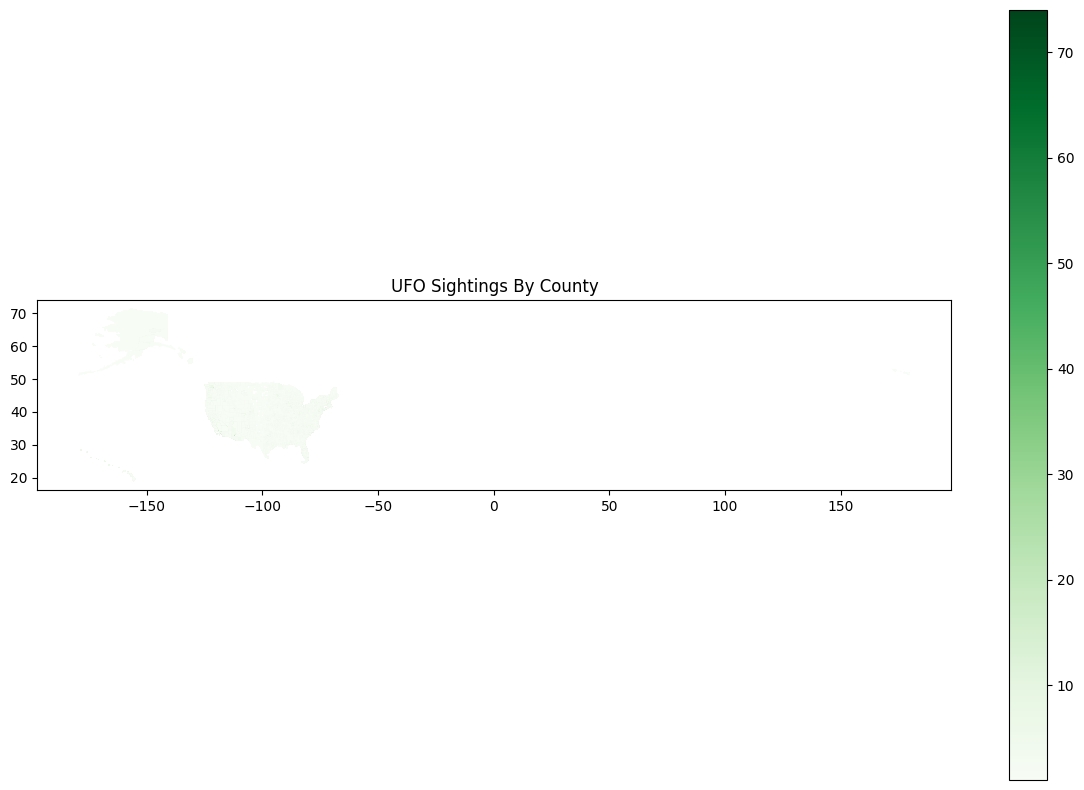

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

geo_df.plot(column='count', cmap="Greens", legend=True, ax=ax)
#ax.set_aspect('equal')
plt.title("UFO Sightings By County")
plt.tight_layout()
plt.show()